In [ ]:
%pip install -q "ipywidgets"

In [552]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
import numpy as np
import ipywidgets as widgets
from ipywidgets.embed import embed_minimal_html
from IPython.display import display
from scipy.optimize import root

In [2]:
T = 0.5
R = 0.5

In [516]:
L = 2
l = 0.5
s = 0.5
lam = 590e-5
alpha = np.pi/180.

In [517]:
def I1(x):

    delta = 2*(s+L)*np.sin(2*alpha)
    Delta = (s+L)*np.cos(2*alpha)+L+l
    phi = 2*np.pi/(lam*Delta)*delta*x
    
    return 2*R*T*(1+np.cos(phi))

In [524]:
xran=np.arange(-1,1,.2)

In [525]:
I1(xran)

array([0.93349021, 0.44849692, 0.02464942, 0.16515044, 0.70319353,
       1.        , 0.70319353, 0.16515044, 0.02464942, 0.44849692])

In [488]:
def smear(x,y):
    
    sigma_x = .1
    sigma_y = 0.02
    
    return R*T*np.exp(-x**2/sigma_x)*np.exp(-y**2/sigma_y)

In [518]:
def smearedI(x,y,add_phase=0,dphi=0):

    sigma_x = .1
    sigma_y = 0.02

    delta = 2*(s+L)*np.sin(2*alpha)
    Delta = (s+L)*np.cos(2*alpha)+L+l
    phi = 2*np.pi/(lam*Delta)*delta*x+add_phase+dphi

    #dist = np.sqrt(x**2+y**2)
    gauss = np.exp(-x**2/sigma_x)*np.exp(-y**2/sigma_y)
    
    return 2*R*T*(1+np.cos(phi))*gauss

In [311]:
colors = [(1,1,1), (1, 0, 0)]  # R -> G -> B
n_bins = [0,100]  # Discretizes the interpolation into bins
cmap_name = 'my_red'
cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=100)

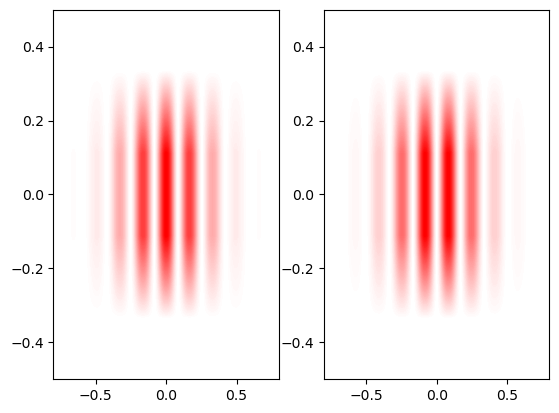

In [312]:
fig,axarr = plt.subplots(1,2)

ax = axarr[0]

ax.set_xlim(-.8,.8)
ax.set_ylim(-.5,.5)
ax.contourf(X,Y,Z1,cmap=cmap,levels=200)

ax = axarr[1]
ax.set_xlim(-.8,.8)
ax.set_ylim(-.5,.5)
ax.contourf(X,Y,Z2,cmap=cmap,levels=200)

In [520]:
blocker = 'None'

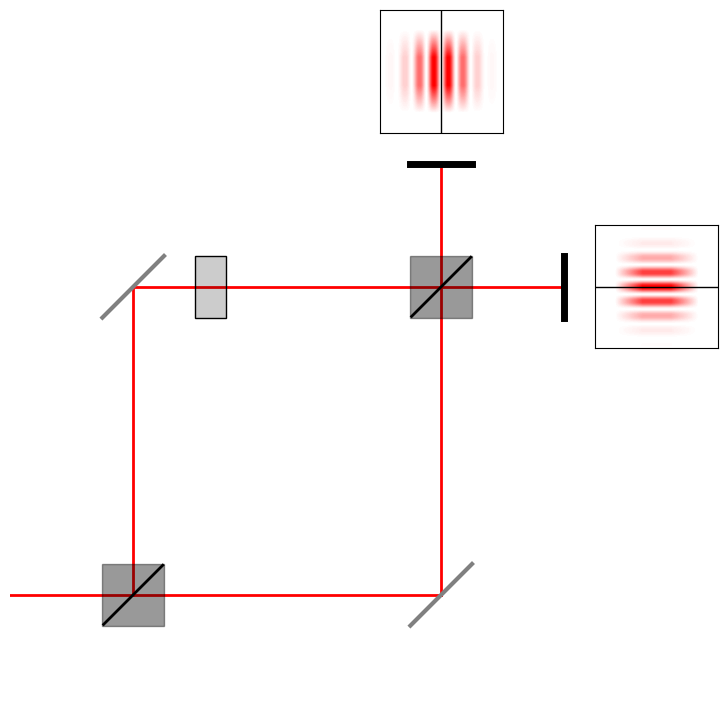

In [521]:
beam_color = 'r'

fig, ax = plt.subplots(figsize=(10, 8))
plt.gca().set_aspect('equal')

# Hide axes
ax.axis('off')

# Define the rectangle and squares
rectangle = Rectangle((0.2, 0.2), 0.5, 0.5, fill=None, edgecolor=beam_color, linewidth=2)
squares = [
    Rectangle((0.15, 0.15), 0.1, 0.1,facecolor='k',alpha=0.4, edgecolor='black', linewidth=1), # Bottom left
    #Rectangle((0.75, 0.15), 0.1, 0.1, fill=None, edgecolor='black', linewidth=2), # Bottom right
    Rectangle((0.65, 0.65), 0.1, 0.1, facecolor='k',alpha=0.4, edgecolor='black', linewidth=1), # Top right
    #Rectangle((0.15, 0.75), 0.1, 0.1, fill=None, edgecolor='black', linewidth=2), # Top left
]

# Draw the fixed rectangle
ax.add_line(Line2D([rectangle.get_x(), rectangle.get_x()+rectangle.get_width()], 
                   [rectangle.get_y(), rectangle.get_y()], color=beam_color, linewidth=2,zorder=-1))
ax.add_line(Line2D([rectangle.get_x(), rectangle.get_x()], 
                   [rectangle.get_y(), rectangle.get_y()+rectangle.get_height()], color=beam_color, linewidth=2,zorder=-1))
# Draw the green lines
ax.add_line(Line2D([0., 0.2], [0.2, 0.2], color=beam_color, linewidth=2,zorder=-1))



# Draw the black squares and lines
for sq in squares:
    ax.add_patch(sq)
    # Draw diagonal line in square
    ax.add_line(Line2D([sq.get_x()+2e-3, sq.get_x() + sq.get_width()-2e-3],
                       [sq.get_y()+2e-3, sq.get_y() + sq.get_height()-2e-3], color='black', linewidth=2))
    #ax.add_line(Line2D([sq.get_x(), sq.get_x() + sq.get_width()],
    #                   [sq.get_y() + sq.get_height(), sq.get_y()], color='black', linewidth=2))

# mirrors
ax.add_line(Line2D([rectangle.get_x()-.05, rectangle.get_x()+.05],
                       [rectangle.get_y()+rectangle.get_height()-.05, rectangle.get_y()
                        +rectangle.get_height()+.05], color='gray', linewidth=3))
ax.add_line(Line2D([rectangle.get_x()+rectangle.get_width()-.05, rectangle.get_x()+rectangle.get_width()+.05],
                       [rectangle.get_y()-.05, rectangle.get_y()+.05], color='gray', linewidth=3))


#screens
ax.add_line(Line2D([rectangle.get_x()+rectangle.get_width()-.05, rectangle.get_x()+rectangle.get_width()+.05],
        [rectangle.get_y()+rectangle.get_height()+.2, rectangle.get_y()+rectangle.get_height()+.2], color='black', linewidth=5))
ax.add_line(Line2D([rectangle.get_x()+rectangle.get_width()+.2, rectangle.get_x()+rectangle.get_width()+.2],
        [rectangle.get_y()+rectangle.get_height()-.05, rectangle.get_y()+rectangle.get_height()+.05], color='black', linewidth=5))

#ax.scatter(0.1,0.2,marker='o',s=80,c='r')

#medium1
rectangle1 = Rectangle((0.3, 0.65), 0.05, 0.1, alpha=.2,facecolor='k', edgecolor=None, linewidth=2)
ax.add_patch(rectangle1)
rectangle1b = Rectangle((0.3, 0.65), 0.05, 0.1, fill=False, edgecolor='k', linewidth=1)
ax.add_patch(rectangle1b)




#block_x
if blocker=='block X':
    blockX = Rectangle((0.45, 0.65), 0.02, 0.1, facecolor='k', edgecolor=None)
    ax.add_patch(blockX)
    ax.add_line(Line2D([rectangle.get_x(), rectangle.get_x()+0.25], 
                   [rectangle.get_y()+rectangle.get_height(), rectangle.get_y()+rectangle.get_height()], 
                    color=beam_color, linewidth=2,zorder=-1))
    ax.add_line(Line2D([rectangle.get_x()+rectangle.get_width(), rectangle.get_x()+rectangle.get_width()], 
                   [rectangle.get_y(), rectangle.get_y()+rectangle.get_height()], 
                    color=beam_color, linewidth=2,zorder=-1))
    ax.add_line(Line2D([0.7, 0.7], [0.7, 0.9], color=beam_color, linewidth=2,zorder=-1))
    Z2 = smear(X,Y)
    Z1 = np.zeros_like(Z2)

elif blocker=='block Y':
    blockY = Rectangle((0.65, 0.45), 0.1, 0.02, facecolor='k', edgecolor=None)
    ax.add_patch(blockY)
    ax.add_line(Line2D([rectangle.get_x(), rectangle.get_x()+rectangle.get_width()], 
                   [rectangle.get_y()+rectangle.get_height(), rectangle.get_y()+rectangle.get_height()], 
                    color=beam_color, linewidth=2,zorder=-1))
    ax.add_line(Line2D([rectangle.get_x()+rectangle.get_width(), rectangle.get_x()+rectangle.get_width()], 
                   [rectangle.get_y(), rectangle.get_y()+0.25], 
                    color=beam_color, linewidth=2,zorder=-1))
    ax.add_line(Line2D([0.7, 0.9], [0.7, 0.7], color=beam_color, linewidth=2,zorder=-1))
    Z1 = smear(X,Y)
    Z2 = np.zeros_like(Z2)
elif blocker=='None':
    ax.add_line(Line2D([rectangle.get_x(), rectangle.get_x()+rectangle.get_width()], 
                   [rectangle.get_y()+rectangle.get_height(), rectangle.get_y()+rectangle.get_height()], 
                    color=beam_color, linewidth=2,zorder=-1))
    ax.add_line(Line2D([rectangle.get_x()+rectangle.get_width(), rectangle.get_x()+rectangle.get_width()], 
                   [rectangle.get_y(), rectangle.get_y()+rectangle.get_height()], 
                    color=beam_color, linewidth=2,zorder=-1))
    ax.add_line(Line2D([0.7, 0.9], [0.7, 0.7], color=beam_color, linewidth=2,zorder=-1))
    ax.add_line(Line2D([0.7, 0.7], [0.7, 0.9], color=beam_color, linewidth=2,zorder=-1))
    
    Z1 = smearedI(X,Y,0)
    Z2 = smearedI(X,Y,np.pi)



# add insets
x = np.arange(-1,1,0.001)
y = np.linspace(-1,1,10)
X, Y = np.meshgrid(x, y)

ins1 = ax.inset_axes([.95,.6,0.2,0.2])
ins1.set_xticks([])
ins1.set_yticks([])
ins1.set_xlim(-.5,.5)
ins1.set_ylim(-.7,.7)
ins1.axhline(0,c='k',lw=1)

ins2 = ax.inset_axes([0.6,.95,0.2,0.2])
ins2.set_xticks([])
ins2.set_yticks([])
ins2.set_xlim(-.7,.7)
ins2.set_ylim(-.5,.5)
ins2.axvline(0,c='k',lw=1)

ins1.contourf(Y,X,Z1,cmap=cmap,levels=200,vmin=0)
ins2.contourf(X,Y,Z2,cmap=cmap,levels=200,vmin=0)






# Show the plot
plt.show()

In [523]:
Z1.max()

0.5394075072376263

In [548]:
def update_plot(gamma,blocker):

    beam_color = 'r'

    fig, ax = plt.subplots(figsize=(10, 8))
    plt.gca().set_aspect('equal')
    
    # Hide axes
    ax.axis('off')
    
    # Define the rectangle and squares
    rectangle = Rectangle((0.2, 0.2), 0.5, 0.5, fill=None, edgecolor=beam_color, linewidth=2)
    squares = [
        Rectangle((0.15, 0.15), 0.1, 0.1,facecolor='k',alpha=0.4, edgecolor='black', linewidth=1), # Bottom left
        #Rectangle((0.75, 0.15), 0.1, 0.1, fill=None, edgecolor='black', linewidth=2), # Bottom right
        Rectangle((0.65, 0.65), 0.1, 0.1, facecolor='k',alpha=0.4, edgecolor='black', linewidth=1), # Top right
        #Rectangle((0.15, 0.75), 0.1, 0.1, fill=None, edgecolor='black', linewidth=2), # Top left
    ]
    
    # Draw the fixed rectangle
    ax.add_line(Line2D([rectangle.get_x(), rectangle.get_x()+rectangle.get_width()], 
                       [rectangle.get_y(), rectangle.get_y()], color=beam_color, linewidth=2,zorder=-1))
    ax.add_line(Line2D([rectangle.get_x(), rectangle.get_x()], 
                       [rectangle.get_y(), rectangle.get_y()+rectangle.get_height()], color=beam_color, linewidth=2,zorder=-1))
    # Draw the green lines
    ax.add_line(Line2D([0., 0.2], [0.2, 0.2], color=beam_color, linewidth=2,zorder=-1))
    
    
    
    # Draw the black squares and lines
    for sq in squares:
        ax.add_patch(sq)
        # Draw diagonal line in square
        ax.add_line(Line2D([sq.get_x()+2e-3, sq.get_x() + sq.get_width()-2e-3],
                           [sq.get_y()+2e-3, sq.get_y() + sq.get_height()-2e-3], color='black', linewidth=2))
        #ax.add_line(Line2D([sq.get_x(), sq.get_x() + sq.get_width()],
        #                   [sq.get_y() + sq.get_height(), sq.get_y()], color='black', linewidth=2))
    
    # mirrors
    ax.add_line(Line2D([rectangle.get_x()-.05, rectangle.get_x()+.05],
                           [rectangle.get_y()+rectangle.get_height()-.05, rectangle.get_y()
                            +rectangle.get_height()+.05], color='gray', linewidth=3))
    ax.add_line(Line2D([rectangle.get_x()+rectangle.get_width()-.05, rectangle.get_x()+rectangle.get_width()+.05],
                           [rectangle.get_y()-.05, rectangle.get_y()+.05], color='gray', linewidth=3))
    
    
    #screens
    ax.add_line(Line2D([rectangle.get_x()+rectangle.get_width()-.05, rectangle.get_x()+rectangle.get_width()+.05],
            [rectangle.get_y()+rectangle.get_height()+.2, rectangle.get_y()+rectangle.get_height()+.2], color='black', linewidth=5))
    ax.add_line(Line2D([rectangle.get_x()+rectangle.get_width()+.2, rectangle.get_x()+rectangle.get_width()+.2],
            [rectangle.get_y()+rectangle.get_height()-.05, rectangle.get_y()+rectangle.get_height()+.05], color='black', linewidth=5))
    
    #ax.scatter(0.1,0.2,marker='o',s=80,c='r')
    
    #medium1
    rectangle1 = Rectangle((0.3, 0.65), 0.05, 0.1, alpha=gamma/(3*np.pi),facecolor='k', edgecolor=None, linewidth=2)
    ax.add_patch(rectangle1)
    rectangle1b = Rectangle((0.3, 0.65), 0.05, 0.1, fill=False, edgecolor='k', linewidth=1)
    ax.add_patch(rectangle1b)
    
    
    x = np.arange(-1,1,0.001)
    y = np.linspace(-1,1,10)
    X, Y = np.meshgrid(x, y)
    
    #block_x
    if blocker=='block X':
        blockX = Rectangle((0.45, 0.65), 0.02, 0.1, facecolor='k', edgecolor=None)
        ax.add_patch(blockX)
        ax.add_line(Line2D([rectangle.get_x(), rectangle.get_x()+0.25], 
                       [rectangle.get_y()+rectangle.get_height(), rectangle.get_y()+rectangle.get_height()], 
                        color=beam_color, linewidth=2,zorder=-1))
        ax.add_line(Line2D([rectangle.get_x()+rectangle.get_width(), rectangle.get_x()+rectangle.get_width()], 
                       [rectangle.get_y(), rectangle.get_y()+rectangle.get_height()], 
                        color=beam_color, linewidth=2,zorder=-1))
        ax.add_line(Line2D([0.7, 0.7], [0.7, 0.9], color=beam_color, linewidth=2,zorder=-1))
        Z2 = smear(X,Y)
        Z1 = np.zeros_like(Z2)
    
    elif blocker=='block Y':
        blockY = Rectangle((0.65, 0.45), 0.1, 0.02, facecolor='k', edgecolor=None)
        ax.add_patch(blockY)
        ax.add_line(Line2D([rectangle.get_x(), rectangle.get_x()+rectangle.get_width()], 
                       [rectangle.get_y()+rectangle.get_height(), rectangle.get_y()+rectangle.get_height()], 
                        color=beam_color, linewidth=2,zorder=-1))
        ax.add_line(Line2D([rectangle.get_x()+rectangle.get_width(), rectangle.get_x()+rectangle.get_width()], 
                       [rectangle.get_y(), rectangle.get_y()+0.25], 
                        color=beam_color, linewidth=2,zorder=-1))
        ax.add_line(Line2D([0.7, 0.9], [0.7, 0.7], color=beam_color, linewidth=2,zorder=-1))
        Z1 = smear(X,Y)
        Z2 = np.zeros_like(Z1)
    elif blocker=='None':
        ax.add_line(Line2D([rectangle.get_x(), rectangle.get_x()+rectangle.get_width()], 
                       [rectangle.get_y()+rectangle.get_height(), rectangle.get_y()+rectangle.get_height()], 
                        color=beam_color, linewidth=2,zorder=-1))
        ax.add_line(Line2D([rectangle.get_x()+rectangle.get_width(), rectangle.get_x()+rectangle.get_width()], 
                       [rectangle.get_y(), rectangle.get_y()+rectangle.get_height()], 
                        color=beam_color, linewidth=2,zorder=-1))
        ax.add_line(Line2D([0.7, 0.9], [0.7, 0.7], color=beam_color, linewidth=2,zorder=-1))
        ax.add_line(Line2D([0.7, 0.7], [0.7, 0.9], color=beam_color, linewidth=2,zorder=-1))
        
        Z1 = smearedI(X,Y,0,gamma)
        Z2 = smearedI(X,Y,np.pi,gamma)
    
    
    
    # add insets
    ins1 = ax.inset_axes([.95,.6,0.2,0.2])
    ins1.set_xticks([])
    ins1.set_yticks([])
    ins1.set_xlim(-.5,.5)
    ins1.set_ylim(-.7,.7)
    ins1.axhline(0,c='k',lw=1,ls='--')
    
    ins2 = ax.inset_axes([0.6,.95,0.2,0.2])
    ins2.set_xticks([])
    ins2.set_yticks([])
    ins2.set_xlim(-.7,.7)
    ins2.set_ylim(-.5,.5)
    ins2.axvline(0,c='k',lw=1,ls='--')
    
    ins1.contourf(Y,X,Z1,cmap=cmap,levels=200,vmin=0,vmax=2.5*R*T)
    ins2.contourf(X,Y,Z2,cmap=cmap,levels=200,vmin=0,vmax=2.5*R*T)
    
    
    
    
    
    
    # Show the plot
    plt.show()

In [549]:
initial_gamma = 0

# Create sliders for adjusting slopes
gamma_slider = widgets.FloatSlider(value=initial_gamma, min=0, max=np.pi, step=0.02, description='$\gamma$ :')

blocker_select = widgets.RadioButtons(
    options=['block X', 'block Y', 'None'],
    value='None', # Defaults to 'pineapple'
#    layout={'width': 'max-content'}, # If the items' names are long
    description='Block intereferometer arm:',
    disabled=False
)                                   

In [550]:
interactive_plot = widgets.interactive(update_plot, gamma=gamma_slider, blocker=blocker_select)

In [551]:
display(interactive_plot)

interactive(children=(FloatSlider(value=0.0, description='$\\gamma$ :', max=3.141592653589793, step=0.02), Rad…